# ***Matlab Vs Python***
## **Solve matrix**
以下是对求解大型稀疏矩阵 ***AX = B*** 进行求解
- MATLAB 
> S=L\R; % **用时大约 0.2990 s**
- Python 
> from scipy.sparse.linalg import spsolve<br> S = spsolve(L, R) # **用时大约 0.468 s**<br>
from numpy.linalg import solve / from scipy.linalg import solve<br> S_py_NP = solve(L_dense, R) # **用时大约 2 min**<br>

**结论：<br>1.求解大型稀疏矩阵的时候scipy中spsolve方法更好,但是比matlab更慢。<br>2.Matlab与Python的结果有部分差异**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

dataFile = 'TestData/scipy_solve.mat'
data = loadmat(dataFile)
L = data['L'];R = data['R'];S_mat = data['S']
L_dense = L.todense()

In [3]:
from scipy.sparse.linalg import spsolve
%time S_py = spsolve(L, R)

CPU times: user 477 ms, sys: 15.9 ms, total: 493 ms
Wall time: 578 ms


In [3]:
from numpy.linalg import solve
%time S_py_NP = solve(L_dense, R)

CPU times: user 7min 3s, sys: 7.05 s, total: 7min 10s
Wall time: 1min 48s


In [4]:
from scipy.linalg import solve
%time S_py_3 = solve(L_dense, R)

CPU times: user 7min 19s, sys: 2.21 s, total: 7min 21s
Wall time: 1min 53s


**Matlab 9.4.0.813654 (R2018a):**

![](TestData/scipy_solve.png)

S_mat (36000, 1) S_py (36000,) S_dis (36000,)
S_dis max: 2.1467203015212988e-14 
S_dis min: -4.3557723600266786e-14


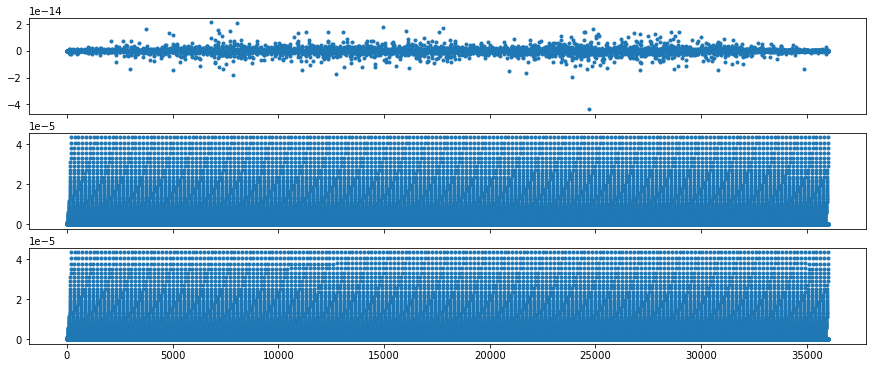

In [31]:
S_dis = S_mat[:,0] - S_py
print('S_mat',S_mat.shape,'S_py',S_py.shape,'S_dis',S_dis.shape)
print('S_dis max:',max(S_dis),'\nS_dis min:',min(S_dis))
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=[15,6])
ax1.plot(S_dis,'.')
ax2.plot(S_mat,'.')
ax3.plot(S_py,'.')